## EDA Student Preformance Indicator

### 1) Problem statement
 > This project understands how the studebt's performance (Test scores) is affected by other variables such as Gender, Ethnicity level of education , Lunch and test perparation course.
 
### 2) Data Collection
 >DataSource-http://roycekimmons.com/tools/generated_data/exams
 >The data consist of 8 column and 1000 rows.
 
### 3) Dataset information
 >lets check in dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('exams.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,standard,none,45,58,61
1,female,group D,some college,free/reduced,none,49,54,57
2,female,group E,bachelor's degree,free/reduced,none,47,64,58
3,male,group E,some high school,standard,completed,84,76,71
4,female,group D,some high school,standard,completed,66,69,74


### 3. Data Checks to perfrom
-Check Missing values

-Check Duplicates

-Check data type

-Check the numberof Unique values of each column

-Check statistics of data set

-Check various categories present in the different categirocal column

In [3]:
# check missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
# Check Duplicates
df.duplicated().sum()

0

There is No duplicates values in the data set

In [5]:
## check dataTypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
##Check the numberof Unique values of each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     74
reading score                  71
writing score                  78
dtype: int64

In [7]:
## Check statistics of the dataset
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.653000,70.210000,68.847000
std,15.242799,14.546804,15.226209
min,20.000000,22.000000,21.000000
25%,57.000000,60.000000,58.000000
50%,68.000000,70.000000,69.000000
75%,78.000000,81.000000,79.000000
max,100.000000,100.000000,100.000000


### Insights or Observation

:-From the above description of numerical data, all mean are very close to each other between 66 and 68

:-All the standard deviation are also close 14.6-15.19

:-While there is a minimum of 0 for maths other are having 17 and 10 value

In [8]:
df['gender'].value_counts()

male      513
female    487
Name: gender, dtype: int64

In [9]:
a=df.columns

In [10]:
numerical_features=[feature for feature in a if df[feature].dtype!='O']
categorical_features=[feature for feature in a if df[feature].dtype=='O']

In [11]:
numerical_features

['math score', 'reading score', 'writing score']

In [12]:
categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [13]:
df['race/ethnicity'].value_counts()

group C    320
group D    254
group B    206
group E    140
group A     80
Name: race/ethnicity, dtype: int64

In [14]:
## Aggregate the total score with mean
df['total_score']=(df['math score']+df['reading score']+df['writing score'])
df['average']=df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group C,some high school,standard,none,45,58,61,164,54.666667
1,female,group D,some college,free/reduced,none,49,54,57,160,53.333333
2,female,group E,bachelor's degree,free/reduced,none,47,64,58,169,56.333333
3,male,group E,some high school,standard,completed,84,76,71,231,77.000000
4,female,group D,some high school,standard,completed,66,69,74,209,69.666667


<AxesSubplot:xlabel='average', ylabel='Count'>

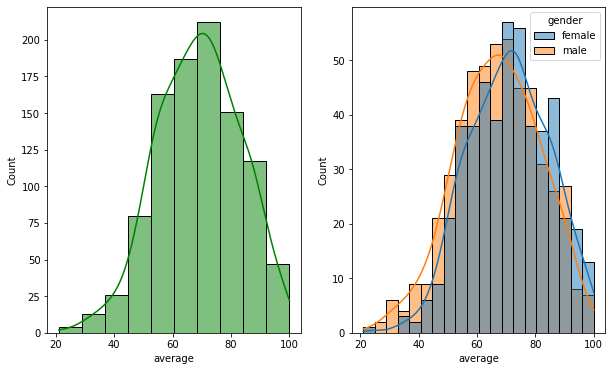

In [15]:
## Explore more Visulization
fig,axis=plt.subplots(1,2,figsize=(10,6))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=10,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')

### Insights
#### -Female student tend to perform well than male student

<AxesSubplot:xlabel='average', ylabel='Count'>

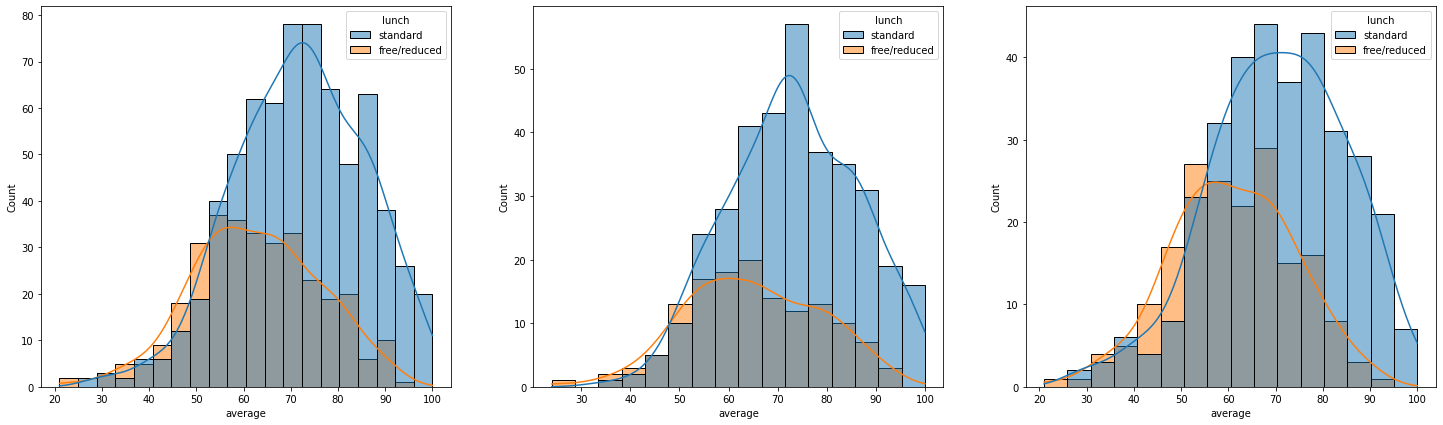

In [20]:
plt.subplots(1,3,figsize=(25,7))
plt.subplot(1,3,1)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')

### Insights
##### :- Standard Lunch help students perform well in exams for both male and     female


<AxesSubplot:xlabel='average', ylabel='Count'>

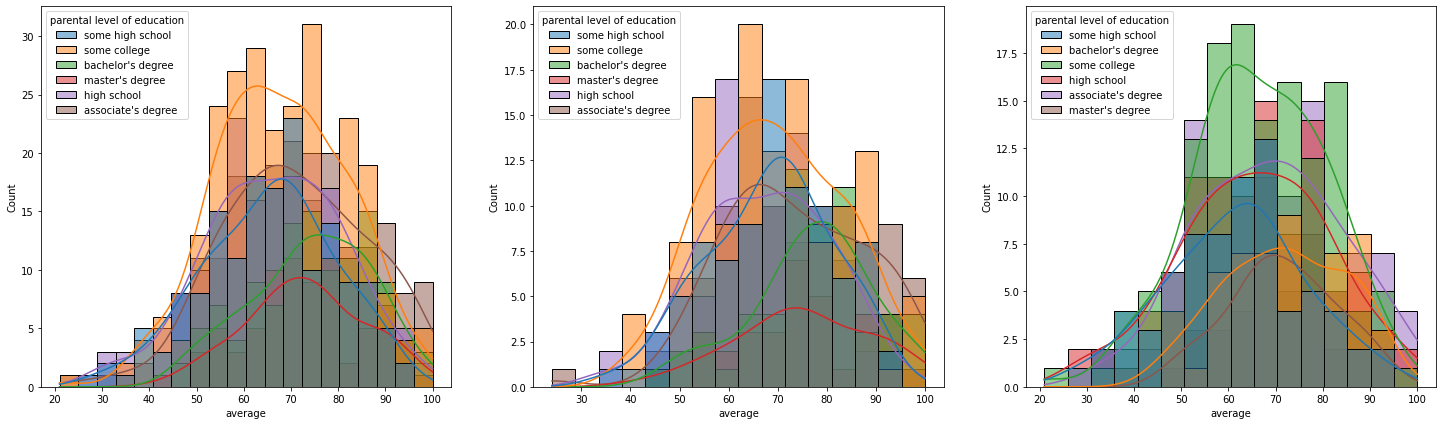

In [21]:
plt.subplots(1,3,figsize=(25,7))
plt.subplot(1,3,1)
sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')

### Insights
#### - In General parent education don't help student perfrom well in exam
#### - 3nd plot shows that parent's whose education is of associate's degree or master's degree thier male chaild tend to perfrom well in exam.
#### - 2rd plot we can see there is no effect of parent's education on female students.

<AxesSubplot:xlabel='average', ylabel='Count'>

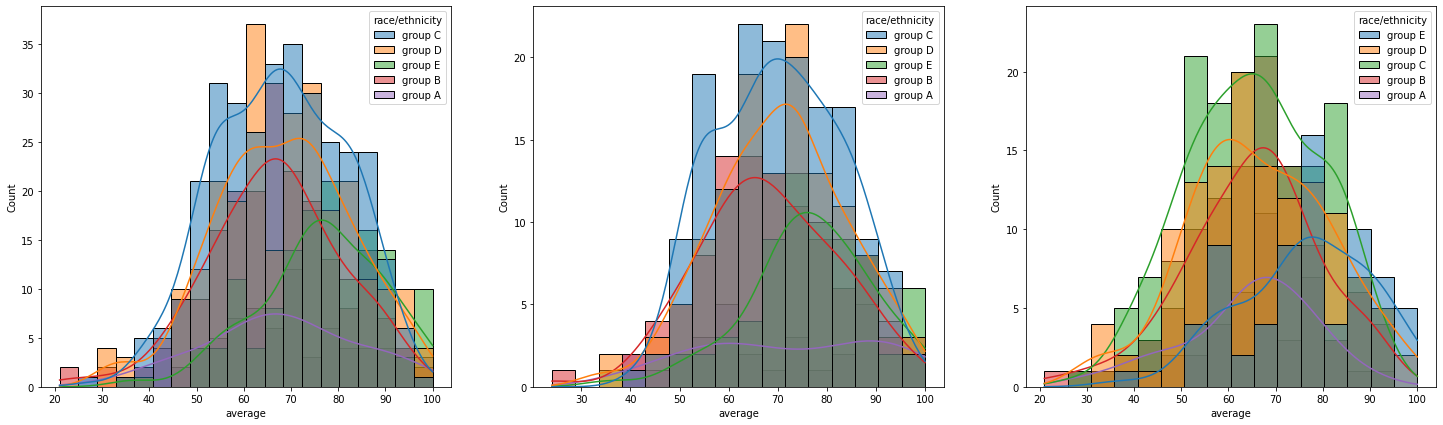

In [22]:
plt.subplots(1,3,figsize=(25,7))
plt.subplot(1,3,1)
sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')

### Insights
#### - Students  of group A and group B tends to perfrom poorly in exam
#### - Students of group A and group B tends to perfrom in poorly exam irrespective of whether they are male or female.

<AxesSubplot:>

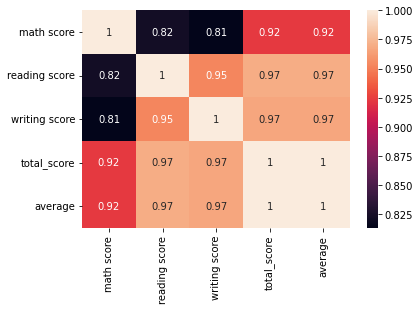

In [24]:
sns.heatmap(df.corr(),annot=True)